In [53]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [54]:
#load the data
df = pd.read_csv('data\IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [55]:
#check the shape of the data
df.dtypes

review       object
sentiment    object
dtype: object

In [56]:
#check for null values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [57]:
#change review column to lower case
df['review'] = df['review'].str.lower()

In [58]:
# Remove HTML Tages
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

df['review']=df['review'].apply(lambda x : remove_html(x))

# Remove Punctuations
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

df['review']=df['review'].apply(lambda x : remove_punct(x))

# Remove Stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

def remove_stopwords(text):
    text=[word for word in text.split() if word not in stop]
    return " ".join(text)

df['review']=df['review'].apply(lambda x : remove_stopwords(x))

# Remove URLS
def remove_urls(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

df['review']=df['review'].apply(lambda x : remove_urls(x))

In [59]:
df

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary schools n...,negative
49998,im going disagree previous comment side maltin...,negative


In [60]:
# Remove Emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" #emoticons
                               u"\U0001F300-\U0001F5FF" #symbols & pictographs
                               u"\U0001F680-\U0001F6FF" #transport & map symbols
                               u"\U0001F1E0-\U0001F1FF" #flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'',text)

df['review']=df['review'].apply(lambda x : remove_emojis(x))

In [61]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
#tokenization
from nltk.tokenize import word_tokenize
df['review'] = df['review'].apply(word_tokenize)

In [63]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [64]:
#  Stemming/Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text


In [65]:

df['review'] = df['review'].apply(lambda x: word_lemmatizer(x))


In [66]:

#convert the list of tokens back to string
def listToString(s):
    str1 = " "
    return (str1.join(s))

df['review'] = df['review'].apply(lambda x: listToString(x))


In [67]:

#visualize most common words
from collections import Counter
cnt = Counter()
for text in df["review"].values:
    for word in text:
        cnt[word] += 1

cnt.most_common(20)

[(' ', 5946625),
 ('e', 4462041),
 ('i', 2673200),
 ('a', 2654560),
 ('t', 2569170),
 ('n', 2440695),
 ('o', 2412019),
 ('r', 2362042),
 ('l', 2064048),
 ('s', 1891720),
 ('d', 1369000),
 ('c', 1347155),
 ('m', 1185634),
 ('u', 1022577),
 ('h', 1020721),
 ('g', 1018420),
 ('p', 849635),
 ('y', 813675),
 ('f', 626949),
 ('w', 557688)]

In [68]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [69]:
from wordcloud import WordCloud

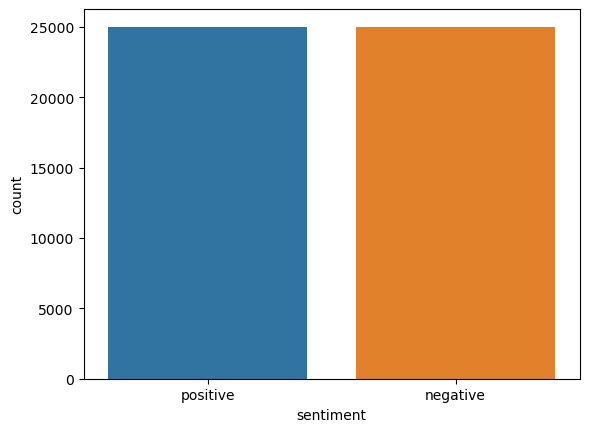

In [70]:
#data visualization
sns.countplot(x='sentiment', data=df)
plt.show()

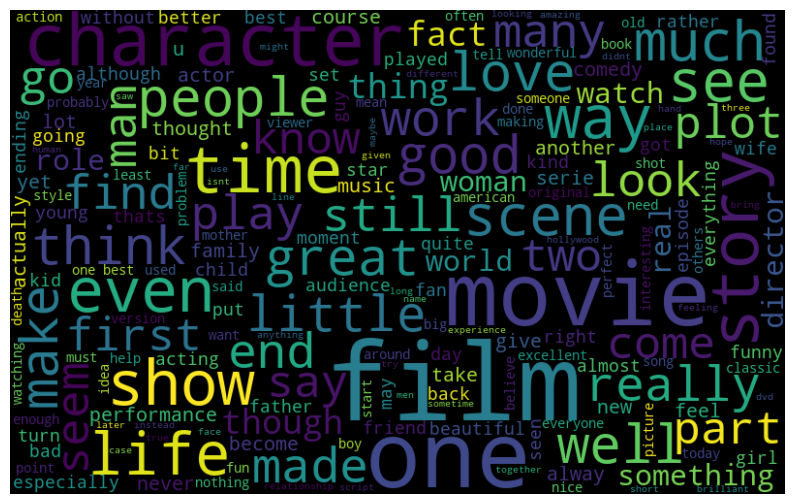

In [71]:
#display the wordcloud for positive sentiment
all_words = ' '.join([text for text in df['review'][df['sentiment'] == 'positive']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


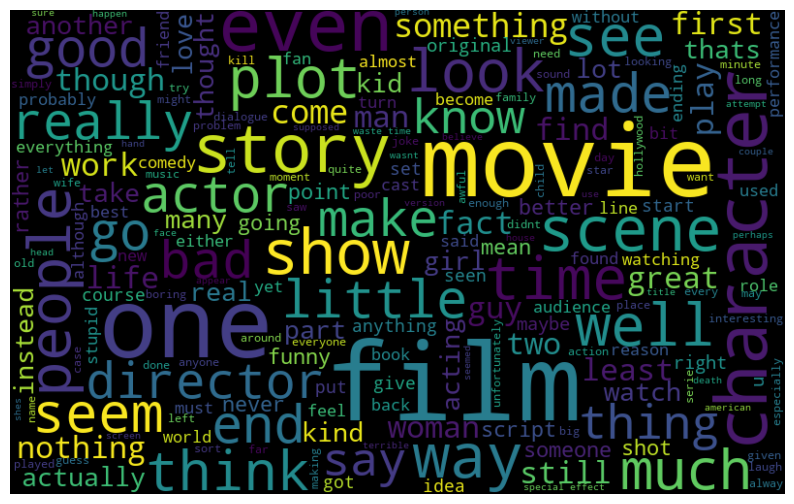

In [72]:
#wordcloud for negative sentiment
all_words = ' '.join([text for text in df['review'][df['sentiment'] == 'negative']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [73]:

#split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

#vectorize the data
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [74]:

#train the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [75]:

#predict the model
y_pred = model.predict(X_test)


In [76]:

#check the accuracy
from sklearn.metrics import accuracy_score
y1=accuracy_score(y_test, y_pred)
print('Accuracy: ', y1*100, '%')


Accuracy:  89.41 %


In [77]:

#check the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[4365,  596],
       [ 463, 4576]], dtype=int64)

In [78]:

#check the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [80]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
y2=accuracy_score(y_test, y_pred)
print('Accuracy: ', y2*100, '%')
print(classification_report(y_test, y_pred))

Accuracy:  85.28 %
              precision    recall  f1-score   support

    negative       0.84      0.86      0.85      4961
    positive       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [81]:
#compare the execution time of both the models
import time

start = time.time()
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
end = time.time()
print('Execution time: ', end-start)

start = time.time()
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
end1 = time.time()
print('Execution time: ', end1-start)


Execution time:  4.921659231185913
Execution time:  274.60699462890625
